#### EVALUACIÓN FINAL MÓDULO 3

##### Fase 1: Exploración y Limpieza

**1. Exploración Inicial:**

- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

In [61]:
# Importamos las librerías necesarias para el tratamiento de datos
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [62]:
# Cargamos los csv con los que vamos a trabajar
df_flight = pd.read_csv("Customer Flight Activity.csv")

df_flight

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [63]:
# Cargamos los csv con los que vamos a trabajar
df_loyalty = pd.read_csv("Customer Loyalty History.csv")

df_loyalty

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

##### INFORMACIÓN Y ESTRUCTURA DEL DATAFRAME: "df_flight"

In [64]:
# Con el método ".info()" obtenemos información general del DataFrame
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [65]:
# El método ".columns" nos devuelve el nombre de todas las columnas del DataFrame 
df_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [66]:
# El método ".head()" nos muestra por defecto la información de las 5 primeras filas
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [67]:
# El método ".tail()" nos muestra por defecto la información de las 5 últimas filas
df_flight.tail()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [68]:
# El método ".sample()" nos muestra por defecto la información de una fila al azar (en este caso le indicamos que queremos 2 filas)
df_flight.sample(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
105154,300806,2017,7,9,9,18,4140,414.0,0,0
333469,755070,2018,8,0,0,0,0,0.0,0,0


In [69]:
# Utilizamos el método ".shape" para saber cuántas filas y columnas tenemos en el DataFrame
print(f"El número de filas que tenemos es: {df_flight.shape[0]}, y el número de columnas es: {df_flight.shape[1]}")

El número de filas que tenemos es: 405624, y el número de columnas es: 10


In [70]:
# Utilizamos el metodo ".describe()" para sacar los principales estadísticos del DataFrame (por defecto, las variables numéricas)
df_flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [71]:
# Con el método ".isnull()" sabremos cuántos valores nulos tiene cada columna del DataFrame (.sum() calcula el total)
df_flight.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [72]:
# El método ".duplicated()" cuenta el total, añadiendo .sum(), de filas duplicadas en el DataFrame
df_flight.duplicated().sum()

1864

##### INFORMACIÓN Y ESTRUCTURA DEL DATAFRAME: "df_loyalty"

In [73]:
# Con el método ".info()" obtenemos información general del DataFrame
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [74]:
# El método ".columns" nos devuelve el nombre de todas las columnas del DataFrame 
df_loyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [75]:
# El método ".head()" nos muestra por defecto la información de las 5 primeras filas
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [76]:
# El método ".tail()" nos muestra por defecto la información de las 5 últimas filas
df_loyalty.tail()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [77]:
# El método ".sample()" nos muestra por defecto la información de una fila al azar (en este caso le indicamos que queremos 2 filas)
df_loyalty.sample(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
6137,579377,Canada,Saskatchewan,Regina,S6J 3G0,Male,Bachelor,85887.0,Divorced,Nova,4822.44,Standard,2015,10,NaN,NaN
6904,793995,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,98023.0,Married,Nova,5680.47,Standard,2015,1,NaN,NaN


In [78]:
# Utilizamos el método ".shape" para saber cuántas filas y columnas tenemos en el DataFrame
print(f"El número de filas que tenemos es: {df_loyalty.shape[0]}, y el número de columnas es: {df_loyalty.shape[1]}")

El número de filas que tenemos es: 16737, y el número de columnas es: 16


In [79]:
# Utilizamos el metodo ".describe()" para sacar los principales estadísticos del DataFrame (por defecto, las variables numéricas)
df_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [80]:
# Hacemos lo mismo para las columnas categóricas, incluyendo entre los paréntesis el parámetro (include = "object")
df_loyalty.describe(include = "object").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [81]:
# Con el método ".isna()" sabremos cuántos valores nulos tiene cada columna del DataFrame (.sum() calcula el total)
df_loyalty.isna().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [82]:
# El método ".duplicated()" cuenta el total, añadiendo .sum(), de filas duplicadas en el DataFrame
df_loyalty.duplicated().sum()

0

- Une los dos conjuntos de datos de la forma más eficiente.

In [83]:
# Usamos esta configuración para poder visualizar todas las columnas del DataFrame
pd.set_option("display.max_columns", None)

In [84]:
# Realizamos un *inner merge*, para combinar los datos utilizando la columna en común en los DataFrame
df_unido = df_flight.merge(df_loyalty, on = "Loyalty Number")

df_unido

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999891,2018,8,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0
405620,999891,2018,9,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0
405621,999891,2018,10,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0
405622,999891,2018,11,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0


**2. Limpieza de Datos:**

- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.

In [85]:
# Cambiamos el formato del nombre de las columnas del DataFrame, iterando sobre cada una de ellas
columnas = [col.lower().replace(" ", "_") for col in df_unido.columns]
df_unido.columns = columnas

df_unido.sample(2)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
50179,220538,2018,8,2,0,2,684,68.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,48042.0,Divorced,Star,2548.39,Standard,2017,12,NaN,NaN
113938,374344,2017,10,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,103651.0,Single,Nova,8923.15,Standard,2017,10,NaN,NaN


In [86]:
# Con el método ".info()" obtenemos información general del DataFrame que hemos unido
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               405624 non-null  int64  
 1   year                         405624 non-null  int64  
 2   month                        405624 non-null  int64  
 3   flights_booked               405624 non-null  int64  
 4   flights_with_companions      405624 non-null  int64  
 5   total_flights                405624 non-null  int64  
 6   distance                     405624 non-null  int64  
 7   points_accumulated           405624 non-null  float64
 8   points_redeemed              405624 non-null  int64  
 9   dollar_cost_points_redeemed  405624 non-null  int64  
 10  country                      405624 non-null  object 
 11  province                     405624 non-null  object 
 12  city                         405624 non-null  object 
 13 

In [87]:
# Utilizamos el método ".shape" para saber cuántas filas y columnas tiene el DataFrame unido
df_unido.shape

(405624, 25)

In [88]:
# Con el método ".isnull()" sabremos cuántos valores nulos tiene cada columna del DataFrame unido (.sum() calcula el total)
df_unido.isnull().sum()

loyalty_number                      0
year                                0
month                               0
flights_booked                      0
flights_with_companions             0
total_flights                       0
distance                            0
points_accumulated                  0
points_redeemed                     0
dollar_cost_points_redeemed         0
country                             0
province                            0
city                                0
postal_code                         0
gender                              0
education                           0
salary                         102672
marital_status                      0
loyalty_card                        0
clv                                 0
enrollment_type                     0
enrollment_year                     0
enrollment_month                    0
cancellation_year              355560
cancellation_month             355560
dtype: int64

In [89]:
# Vamos a contar el número de valores negativos que tiene la columna "salary"
conteo_negativos = df_unido[df_unido["salary"] < 0]["salary"].count()

conteo_negativos

480

In [90]:
# Calculamos el porcentaje de esos valores para decidir qué hacer con ellos
salario_negativo = df_unido[df_unido["salary"] < 0]["salary"].count()
porcentaje_salario_neagativo = salario_negativo / df_unido.shape[0] * 100

porcentaje_salario_neagativo

0.11833619312466717

In [91]:
# Corregimos los valores negativos de "salary", porque consideramos que se han introducido por error (porcentaje muy bajo)
df_unido["salary"] = abs(df_unido["salary"])

df_unido["salary"].describe()

count    302952.000000
mean      79381.440228
std       34735.904533
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88612.000000
max      407228.000000
Name: salary, dtype: float64

In [92]:
# Contamos de nuevo el número total de duplicados del DataFrame unido
duplicados = df_unido.duplicated().sum()

# Calculamos el porcentaje de duplicados
porcentaje_duplicados = (duplicados / len(df_unido)) * 100

print(f"El número total de duplicados es: {duplicados}")
print(f"El porcentaje de duplicados es: {porcentaje_duplicados:.2f}%")

El número total de duplicados es: 1864
El porcentaje de duplicados es: 0.46%


In [93]:
# Eliminamos los valores duplicados en todo el DataFrame
df_unido.drop_duplicates(inplace=True)

In [94]:
df_unido.duplicated().sum()

0

In [95]:
# Calculamos el porcentaje de valores NaN en las columnas seleccionadas
columnas_nulas = ["salary", "cancellation_year", "cancellation_month"]
porcentaje_nulos = df_unido[columnas_nulas].isnull().sum() / df_unido.shape[0] * 100

porcentaje_nulos

salary                25.326927
cancellation_year     87.703091
cancellation_month    87.703091
dtype: float64

In [96]:
# Ajustamos y transformamos los datos imputando los valores faltantes
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# Creamos una copia del DataFrame original
df_final = df_unido.copy()  
df_final["salary"] = imputer_iterative.fit_transform(df_final[["salary"]])

In [97]:
# Aplicamos la transformación con una función lambda usando apply
df_final[["cancellation_year", "cancellation_month"]] = df_final[["cancellation_year", "cancellation_month"]].apply(lambda col: col.fillna("Uncancelled"))

- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.

In [98]:
# Guardamos el DataFrame de Pandas en un archivo csv
df_final.to_csv("Archivo Customer.csv")

In [99]:
# Comprobamos que los valores aparecen de manera coherente tras el proceso de limpieza de datos
df_final.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,Uncancelled,Uncancelled
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,Uncancelled,Uncancelled
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,Uncancelled,Uncancelled
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,Uncancelled,Uncancelled
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,Uncancelled,Uncancelled


- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [100]:
# Creamos una función con la lista de las columnas que queremos convertir a float
columnas_float = ["distance", "dollar_cost_points_redeemed", "points_redeemed"]

def convertir_float(df_final, columnas_float):
    for column in columnas_float:
        df_final[column] = df_final[column].astype(float)
    return df_final

df_final = convertir_float(df_final, columnas_float)

In [101]:
# Comprobamos que se han efectuado los cambios correctamente (a modo de ejemplo)
df_final["dollar_cost_points_redeemed"].dtypes

dtype('float64')

##### Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

**3. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?**

In [102]:
# Agrupamos los datos por año y mes, y sumamos la cantidad de vuelos reservados en cada grupo
df_vuelos = df_final.groupby(["year", "month"])["flights_booked"].sum().reset_index()

df_vuelos

,year,month,flights_booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


In [103]:
# Filtramos el DataFrame para obtener sólo los datos del año 2017
df_filtrado1 = df_final[df_final["year"] == 2017]

# Agrupamos los datos por mes y sumamos la cantidad de vuelos reservados
df_2017 = df_filtrado1.groupby(["month", "year"])["flights_booked"].sum().reset_index()

df_2017

,month,year,flights_booked
0,1,2017,47766
1,2,2017,47691
2,3,2017,64271
3,4,2017,55720
4,5,2017,65279
5,6,2017,80493
6,7,2017,89288
7,8,2017,78692
8,9,2017,63304
9,10,2017,60351


In [104]:
# Filtramos el DataFrame para obtener sólo los datos del año 2018
df_filtrado2 = df_final[df_final["year"] == 2018]

# Agrupamos los datos por mes y sumamos la cantidad de vuelos reservados
df_2018 = df_filtrado2.groupby(["month", "year"])["flights_booked"].sum().reset_index()

df_2018

,month,year,flights_booked
0,1,2018,49170
1,2,2018,48643
2,3,2018,66928
3,4,2018,56791
4,5,2018,76891
5,6,2018,92749
6,7,2018,104143
7,8,2018,90512
8,9,2018,73075
9,10,2018,69110


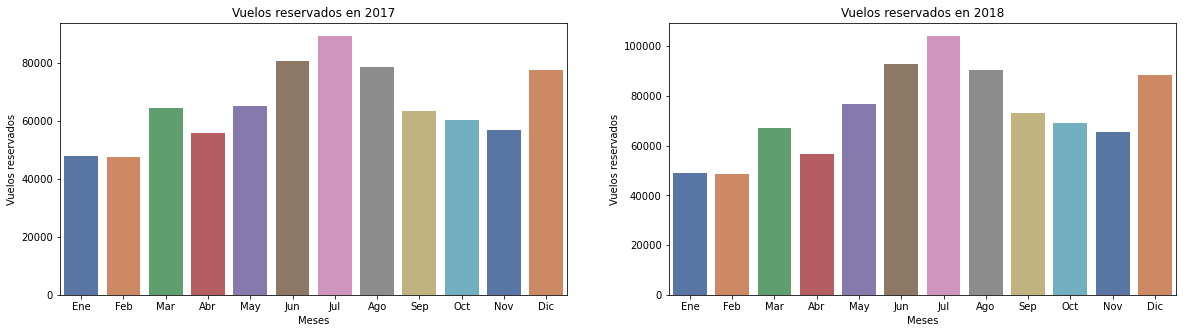

In [105]:
# Establecemos nuestra gráfica con un "barplot", indicando el número de filas y columnas que queremos
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Con Seaborn usaremos el parámetro "ax" donde especificamos la posición de la gráfica
sns.barplot(x = "month",
            y = "flights_booked", 
            data = df_2017, 
            ax = axes[0], 
            palette= "deep")

sns.barplot(x = "month", 
               y = "flights_booked", 
               data = df_2018, 
               ax = axes[1], 
               palette = "deep")

axes[0].set_title("Vuelos reservados en 2017")
axes[0].set_xlabel("Meses")
axes[0].set_ylabel("Vuelos reservados")
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])

axes[1].set_title("Vuelos reservados en 2018")
axes[1].set_xlabel("Meses")
axes[1].set_ylabel("Vuelos reservados")
axes[1].set_xticks(range(12))
axes[1].set_xticklabels(["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]);

**4. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?**

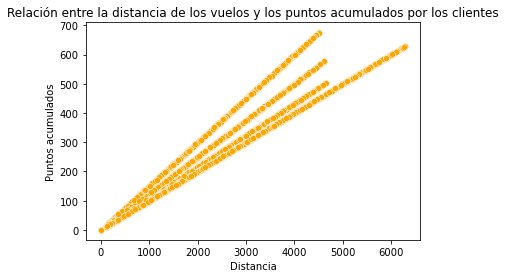

In [106]:
# Realizamos la gráfica con un "scatterplot" para mostrar la relación entre estas dos variables numéricas
sns.scatterplot(x = "distance", 
                y = "points_accumulated", 
                data = df_final,
                color = "orange")

plt.xlabel("Distancia")
plt.ylabel("Puntos acumulados")
plt.title("Relación entre la distancia de los vuelos y los puntos acumulados por los clientes");

**5. ¿Cuál es la distribución de los clientes por provincia o estado?**

In [107]:
# Hacemos el groupby por "province" y contamos el número de clientes únicos en cada provincia
df_clientes = df_final.groupby("province")["loyalty_number"].count().reset_index()

df_clientes

,province,loyalty_number
0,Alberta,23360
1,British Columbia,106442
2,Manitoba,15900
3,New Brunswick,15352
4,Newfoundland,6244
5,Nova Scotia,12507
6,Ontario,130258
7,Prince Edward Island,1584
8,Quebec,79573
9,Saskatchewan,9861


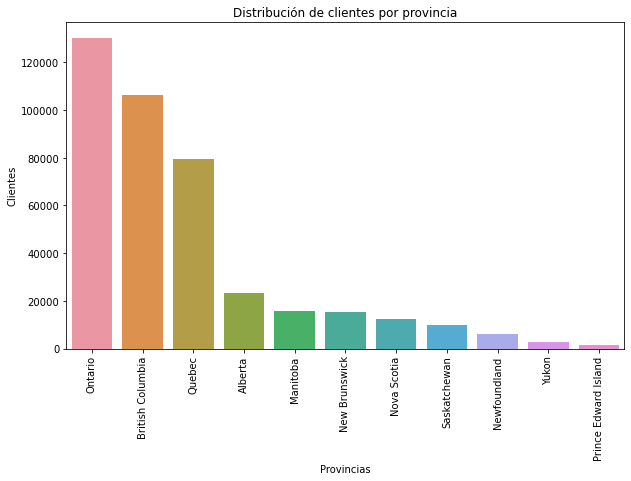

In [108]:
# Graficamos con un diagrama de barras para visualizar esta distribución
plt.figure(figsize=(10, 6))

sns.barplot(x = "province",
            y = "loyalty_number", 
            data = df_clientes,
            order = df_final["province"].value_counts().index)

plt.xticks(rotation = 90)

plt.xlabel("Provincias")
plt.ylabel("Clientes")
plt.title("Distribución de clientes por provincia");

**6. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?**

In [109]:
# Agrupamos los datos por la columna "education" y calculamos la media de la columna "salary"
df_final.groupby("education")["salary"].mean().round(2).reset_index()

,education,salary
0,Bachelor,72599.08
1,College,79371.73
2,Doctor,178403.68
3,High School or Below,61146.38
4,Master,103734.52


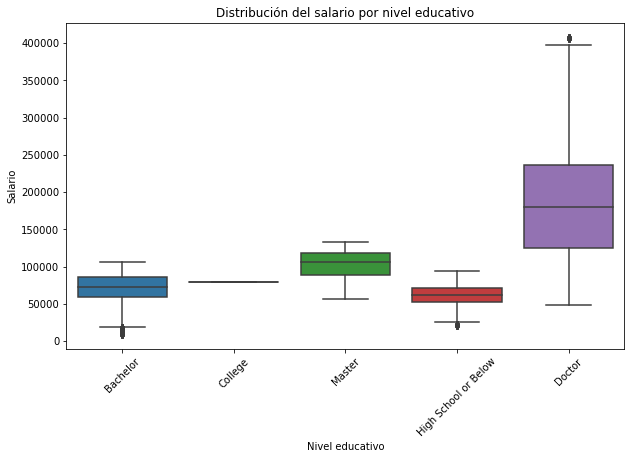

In [110]:
# Creamos un gráfico de "boxplot" para visualizar la distribución del salario por nivel educativo
plt.figure(figsize=(10, 6))

sns.boxplot(x = "education",
            y = "salary", 
            data = df_final)
            
plt.xlabel("Nivel educativo")
plt.ylabel("Salario")
plt.title("Distribución del salario por nivel educativo")
plt.xticks(rotation = 45);

**7. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?**

In [111]:
# Agrupamos por el tipo de tarjeta y luego contamos las que hay en cada categoría
df_tarjetas = df_final.groupby("loyalty_card")["loyalty_number"].count().reset_index()

df_tarjetas

,loyalty_card,loyalty_number
0,Aurora,83132
1,Nova,136883
2,Star,183745


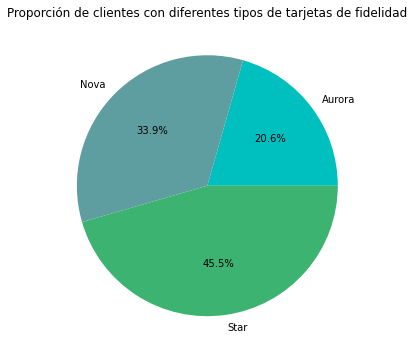

In [112]:
# Definimos los colores para cada tipo de tarjeta de fidelidad
colores = ["c", "cadetblue", "mediumseagreen"]

# Creamos un gráfico de torta (con porcentajes)
plt.figure(figsize=(6, 6), facecolor="white")

plt.pie("loyalty_number",
        labels = "loyalty_card",
        data = df_tarjetas,
        autopct = "%1.1f%%", 
        colors = colores)

plt.title("Proporción de clientes con diferentes tipos de tarjetas de fidelidad");

**8. ¿Cómo se distribuyen los clientes según su estado civil y género?**

In [113]:
# Creamos una tabla de contingencias que nos muestra la frecuencia con la que tiene lugar cada combinación de categorías
tabla_contingencia = pd.crosstab(df_final["marital_status"], df_final["gender"])

tabla_contingencia

gender,Female,Male
marital_status,,
Divorced,30634,30128
Married,117363,117482
Single,54760,53393


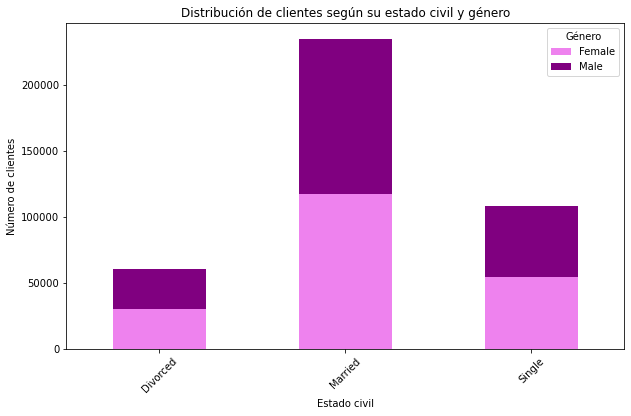

In [114]:
# Creamos un gráfico de barras apiladas para visualizar mejor la distribución
tabla_contingencia.plot(kind = "bar", 
                        stacked = True, 
                        figsize = (10, 6),
                        color = ["violet", "purple"])

plt.title("Distribución de clientes según su estado civil y género")
plt.xlabel("Estado civil")
plt.ylabel("Número de clientes")
plt.xticks(rotation = 45)
plt.legend(title = "Género");

##### Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

**Objetivo del Ejercicio:**

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

**9. Preparación de Datos:**

- Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [115]:
# Con la función ".loc" seleccionamos el subconjunto de datos que queremos ver
df_final.loc[:, ["flights_booked", "education"]]

,flights_booked,education
0,3,Bachelor
1,2,Bachelor
2,6,Bachelor
3,4,Bachelor
4,0,Bachelor
...,...,...
405619,0,Bachelor
405620,0,Bachelor
405621,0,Bachelor
405622,0,Bachelor


**10. Análisis Descriptivo:**

- Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.


In [116]:
# Calculamos estadísticas descriptivas del número de vuelos, agrupados por el nivel educativo 
df_final.groupby("education")["flights_booked"].describe().reset_index()

,education,count,mean,std,min,25%,50%,75%,max
0,Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
1,College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
2,Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
3,High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
4,Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


**11. Prueba Estadística:**

- Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

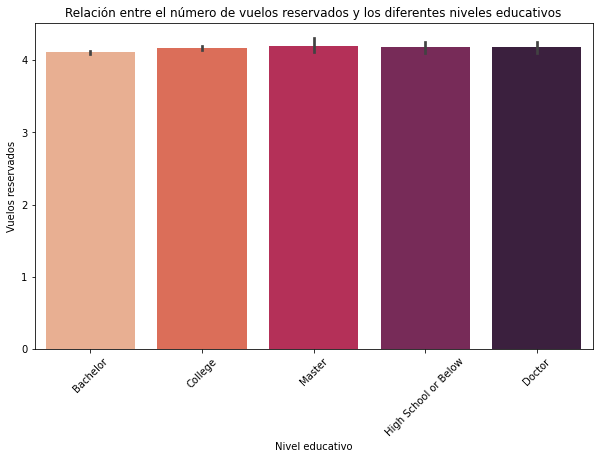

In [117]:
# Graficamos con un diagrama de barras para visualizar esta distribución
plt.figure(figsize=(10, 6))

sns.barplot(x = "education",
            y = "flights_booked", 
            data = df_final,
            palette = "rocket_r")

plt.xticks(rotation = 45)

plt.xlabel("Nivel educativo")
plt.ylabel("Vuelos reservados")
plt.title("Relación entre el número de vuelos reservados y los diferentes niveles educativos");

In [118]:
# Creamos un filtro de las dos columnas sobre las que queremos realizar la prueba A/B testing
datos_filtrados = df_final[["education", "flights_booked"]]

In [119]:
# ANOVA nos sirve para comparar más de dos grupos (en este caso, varios niveles educativos)
# Usamos la función "f_oneway" para realizar un análisis de varianza (ANOVA)
anova_result = stats.f_oneway(
    datos_filtrados[datos_filtrados["education"] == "Bachelor"]["flights_booked"],
    datos_filtrados[datos_filtrados["education"] == "College"]["flights_booked"],
    datos_filtrados[datos_filtrados["education"] == "Doctor"]["flights_booked"],
    datos_filtrados[datos_filtrados["education"] == "High School or Below"]["flights_booked"],
    datos_filtrados[datos_filtrados["education"] == "Master"]["flights_booked"])

# Comprobamos si la p-value es mayor a 0.05
if anova_result.pvalue > 0.05:
    print("No hay una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos (p-value: {:.4f})".format(anova_result.pvalue))
else:
    print("Hay una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos (p-value: {:.4f})".format(anova_result.pvalue))

Hay una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos (p-value: 0.0064)
